In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymbar # for MBAR analysis
from pymbar import timeseries # for timeseries analysis

import os, sys
import tables as tb
import mdtraj as md
import scipy.stats as sps

upside_path = '/project/dinner/scguo/upside2'
upside_utils_dir = os.path.expanduser(upside_path + "/py")
sys.path.insert(0, upside_utils_dir)

import mdtraj_upside as mu
# import upside_engine as ue

In [2]:
a_dg_file = '/project/dinner/aanto/kaiB/up2/andys_dgs.csv'
a_dgs = np.genfromtxt(a_dg_file, delimiter=',')

a_dg_file1 = '/project/dinner/aanto/kaiB/up2/dgs_al_45.csv'
a_dg_file2 = '/project/dinner/aanto/kaiB/up2/dgs_al_65.csv'
a_ms_file = '/project/dinner/aanto/kaiB/up2/dgs_al_mvalue_new.csv'
a_dgs1 = np.genfromtxt(a_dg_file1, delimiter=',')
a_dgs2 = np.genfromtxt(a_dg_file2, delimiter=',')
a_ms = np.genfromtxt(a_ms_file, delimiter=',')

in_ex2 = a_dgs1[a_dgs1[:,-2]==1,-1]

in_region1 = a_dgs1[:,-2].astype(bool)
in_region2 = a_dgs2[:,-2].astype(bool)
in_region3 = a_ms[:,-2].astype(bool)
a_dgs1_trimmed = a_dgs1[in_region1]
a_dgs2_trimmed = a_dgs2[in_region2]
a_ms_trimmed = a_ms[in_region3]

In [1]:
color_arr = []
alpha_arr = []

for r in np.arange(0,99):
    if r >=8 and r <=13:
        color='red'
    elif r >=20 and r <= 34:
        color='red'
    elif r >=40 and r <=45:
        color='red'
    elif r >= 49 and r <= 55:
        color = 'purple'
    elif r >= 63 and r <= 68:
        color='orange'
    elif r >= 72 and r <= 76:
        color='green'
    elif r >= 83 and r <= 93:
        color='blue' 
    else: 
        color='gray'
    if np.isin(r+1, a_dgs1_trimmed[:,-1]):
        alpha1=1
    else:
        alpha1=0.12
    if np.isin(r+1, a_dgs2_trimmed[:,-1]):
        alpha2=1
    else:
        alpha2=0.12
    if np.isin(r+1, a_ms_trimmed[:,-1]):
        alpha3=1
    else:
        alpha3=0.12
    color_arr.append(color)
    alpha_arr.append([alpha1,alpha2,alpha3])
color_arr = np.asarray(color_arr)
alpha_arr = np.asarray(alpha_arr)

NameError: name 'np' is not defined

# Load Data - For FS (cis)

In [4]:
#Define starting variables

pdb_id      = 'fs_almut'
start_frame = 2000
work_dir         = '/project/dinner/aanto/kaiB/up2/20220218_al1_repex/run_0'
n_rep            = 48     # replica number
input_dir  = "{}/inputs".format(work_dir)
result_dir = "{}/results".format(work_dir)

In [5]:
Pot = []
Rg  = []
Rmsd = []
Hb = []
Ts = []
T  = []
PS = []
for i in range(n_rep):
    j=str(i).zfill(2)
    Pot.append(  np.load('{}/{}_{}_Energy.npy'.format(result_dir, pdb_id, j))[:,0] ) 
    Rg.append(   np.load('{}/{}_{}_Rg.npy'    .format(result_dir, pdb_id, j)) ) 
    Hb.append(   np.load('{}/{}_{}_Hbond.npy' .format(result_dir, pdb_id, j)) ) 
    Rmsd.append( np.load('{}/{}_{}_Rmsd.npy'  .format(result_dir, pdb_id, j)) ) 
    PS.append( np.load('{}/{}_{}_PS.npy'  .format(result_dir, pdb_id, j)) ) 

    t = np.load( '{}/{}_{}_T.npy'.format(result_dir, pdb_id, j) )
    nsize = Pot[-1].size
    Ts.append(np.zeros(nsize) + t )
    T.append(t)
    
Rmsd = np.array(Rmsd)
Pot  = np.array(Pot)
Rg   = np.array(Rg)
Hb   = np.array(Hb)
Ts   = np.array(Ts)
T    = np.array(T)
PS   = np.array(PS)

res = np.loadtxt('{}/{}.resid'.format(result_dir, pdb_id), dtype=int)
n_res = res.size

print(PS.shape, Rmsd.shape, Pot.shape, Rg.shape)

(48, 39997, 91) (48, 39997) (48, 39997) (48, 39997)


# MBAR

In [6]:
kB   = 1.0 # upside unit
T    = np.array(T)
beta = 1 / (kB * T)

cE0 = Pot[:,start_frame:]

FN           = cE0[0].size
FNs          = np.zeros([n_rep], np.int32) + FN
reducedPot0  = np.zeros([n_rep,n_rep,FN], np.float32)
for k in range(n_rep):
    for l in range(n_rep):
        reducedPot0[k,l] = beta[l] * cE0[k]

In [7]:
mbar0 = pymbar.MBAR(reducedPot0, FNs, verbose=True)

K (total states) = 48, total samples = 1823856
N_k = 
[37997 37997 37997 37997 37997 37997 37997 37997 37997 37997 37997 37997
 37997 37997 37997 37997 37997 37997 37997 37997 37997 37997 37997 37997
 37997 37997 37997 37997 37997 37997 37997 37997 37997 37997 37997 37997
 37997 37997 37997 37997 37997 37997 37997 37997 37997 37997 37997 37997]
There are 48 states with samples.
Initializing free energies to zero.
Initial dimensionless free energies with method zeros
f_k = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Determining dimensionless free energies by Newton-Raphson / self-consistent iteration.
self consistent iteration gradient norm is 1.4443e+11, Newton-Raphson gradient norm is 1.4624e+11
Choosing self-consistent iteration on iteration 0
self consistent iteration gradient norm is 6.5175e+10, Newton-Raphson gradient norm is 9.7119e+10
Choosing self-consistent iteration for low

# Calculate dG_HX at different Ts

In [29]:
dGhx_T = []
for k in range(T.size):
    t = T[k]
    tt = t/0.85*298. # true temperature (estimated)

    u_n = (cE0/(t*kB)).flatten() # convert back to unstandardized energies (not in units of kT)
    log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
    w1 = np.exp(log_w1)
    w1 /= np.sum(w1)

    dG = np.zeros(n_res)
    for r in range(n_res):
        pf_i = PS[:,start_frame:,r].flatten()
        mean_pf = np.average(pf_i, weights=w1)
        if mean_pf == 1:
            print(k, r)
            dG[r] = 1000.
        else:
            dG[r] = 0.001987*tt*np.log((mean_pf/(1.-mean_pf)))
    dGhx_T.append(dG)
dGhx_T = np.array(dGhx_T)

In [30]:
dGhx_T.shape

(48, 91)

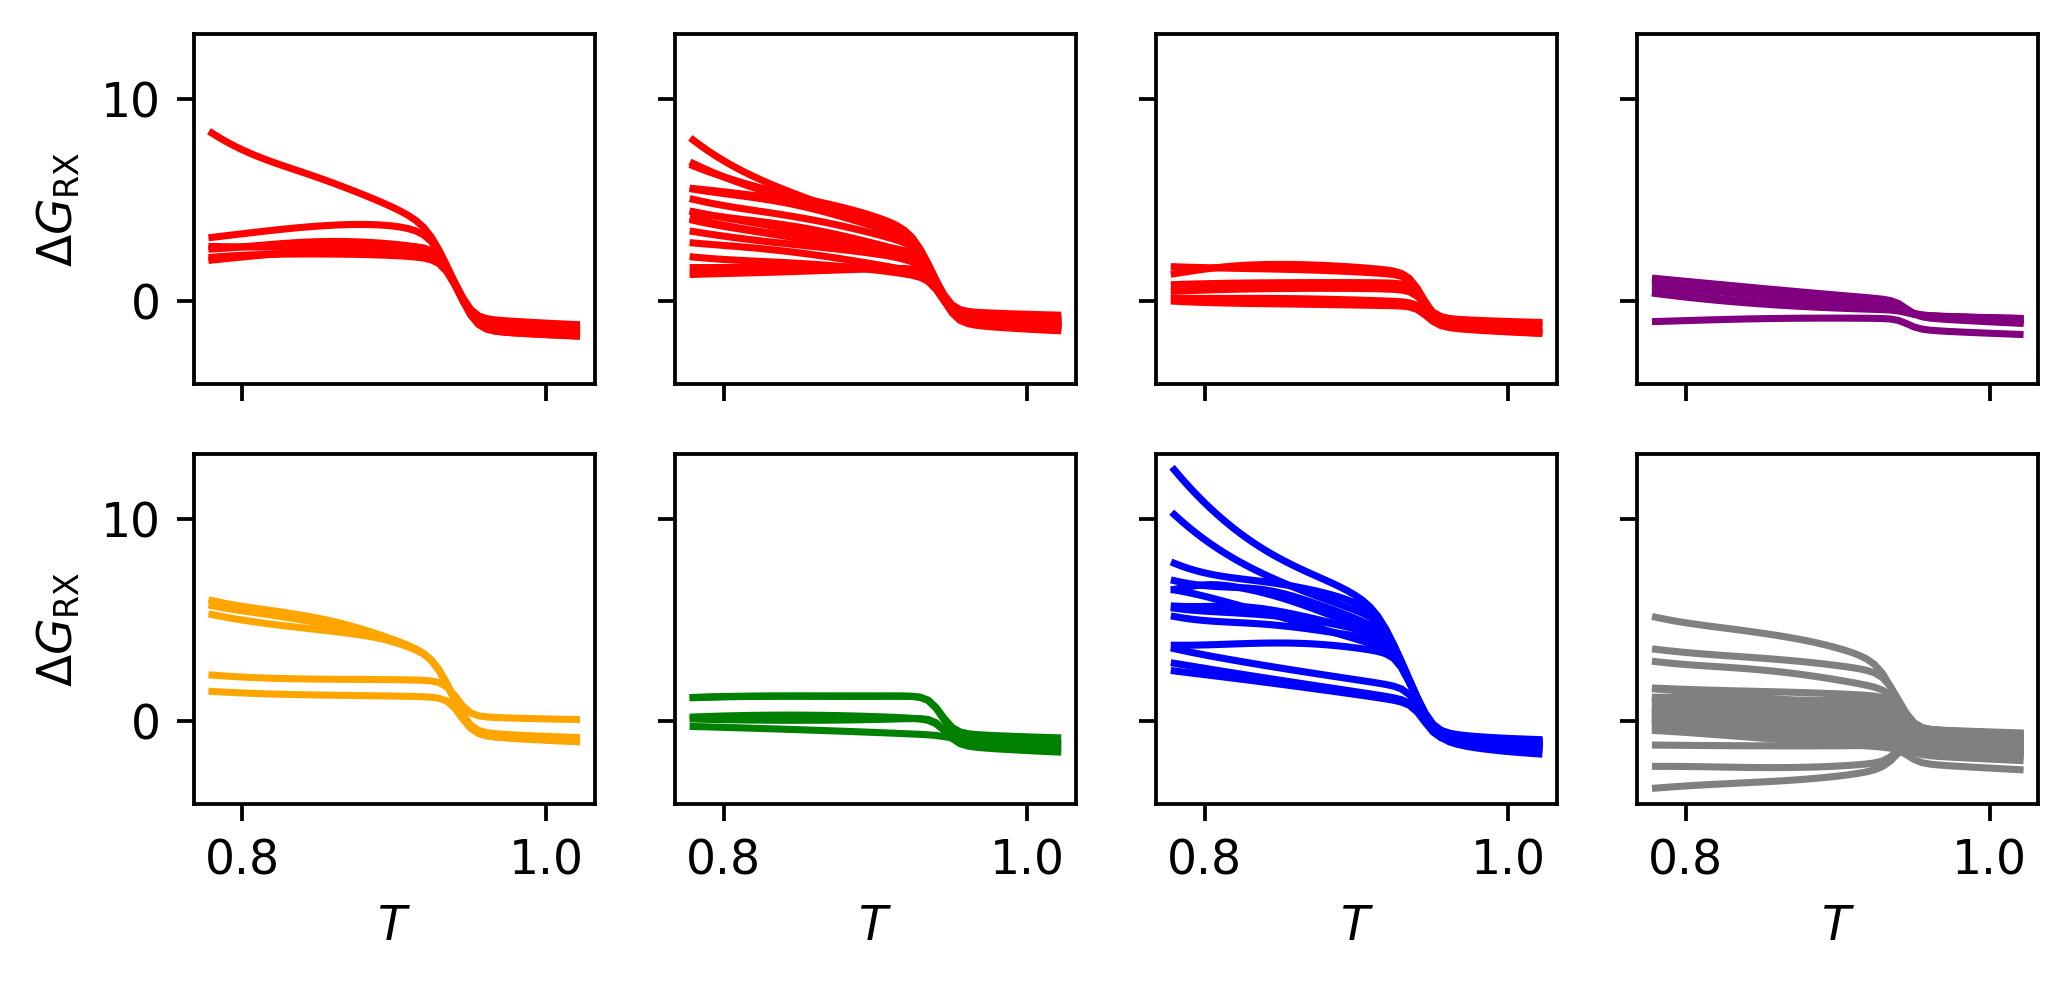

In [40]:
f, ax = plt.subplots(2, 4, figsize=(7,3), dpi=340, sharey=True, sharex=True)

for i,r in enumerate(res):
    if r >=9 and r <=14:
        color='red'
        j, k = 0, 0
    elif r >=21 and r <= 35:
        color='red'
        j, k = 0, 1
    elif r >=41 and r <=46:
        color='red'
        j, k = 0, 2
    elif r >= 50 and r <= 56:
        color = 'purple'
        j, k = 0, 3
    elif r >=64 and r <=69:
        color='orange'
        j, k = 1, 0
    elif r >=73 and r <=77:
        color='green'
        j, k = 1, 1
    elif r >=84 and r <=96:
        color='blue' 
        j, k = 1, 2
    else:
        color = 'gray'
        j, k = 1, 3
    ax[j,k].plot(T, dGhx_T[:,i],color=color)

for a in ax.flat:
    a.set_xlabel('$T$ / A.U.')
    a.set_ylabel('$\Delta G_{\mathrm{HX}}$')
    a.label_outer()

# Calculate dG_HX at different denaturant concentrations

In [8]:
T_target = 0.875   # the T you want to use 
m_sens   = 0.25  # it is the sensitivity of the denaturant.
                 # a larger value means a lower concentration 
                 # to unfold the protein
                 # 0.05 is a not bad initial guess for urea

# the number of protected residues in evergy frame
pf_frame = np.sum(PS[:,start_frame:,:], axis=2).flatten()

# [den]
den_min = 0.0
den_max = 5
den_bin = 50
den  = np.linspace(den_min, den_max, den_bin+1)

# reweight to T_target
TT = T_target/0.85*298
m = m_sens*-pf_frame
u_n    = (cE0/(T_target*kB)).flatten()
log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
w1     = np.exp(log_w1)
w1    /= np.sum(w1)

# dG at different [den]
dGhx_D = []
for d in den:
    w  = np.exp(m*d/T_target)*w1
    w /= np.sum(w)
    
    probp = np.zeros(n_res)
    for j in range(n_res):
        pf_i = PS[:,start_frame:,j].flatten()
        probp[j] = np.sum(pf_i*w)
    probu = 1. - probp
    dGhx_D.append(TT*np.log(probp/probu)*0.001987)
dGhx_D = np.array(dGhx_D)

# m-value: the slope of dG vs [den]
mValue = np.diff(dGhx_D, axis=0)/(den[0]-den[1])

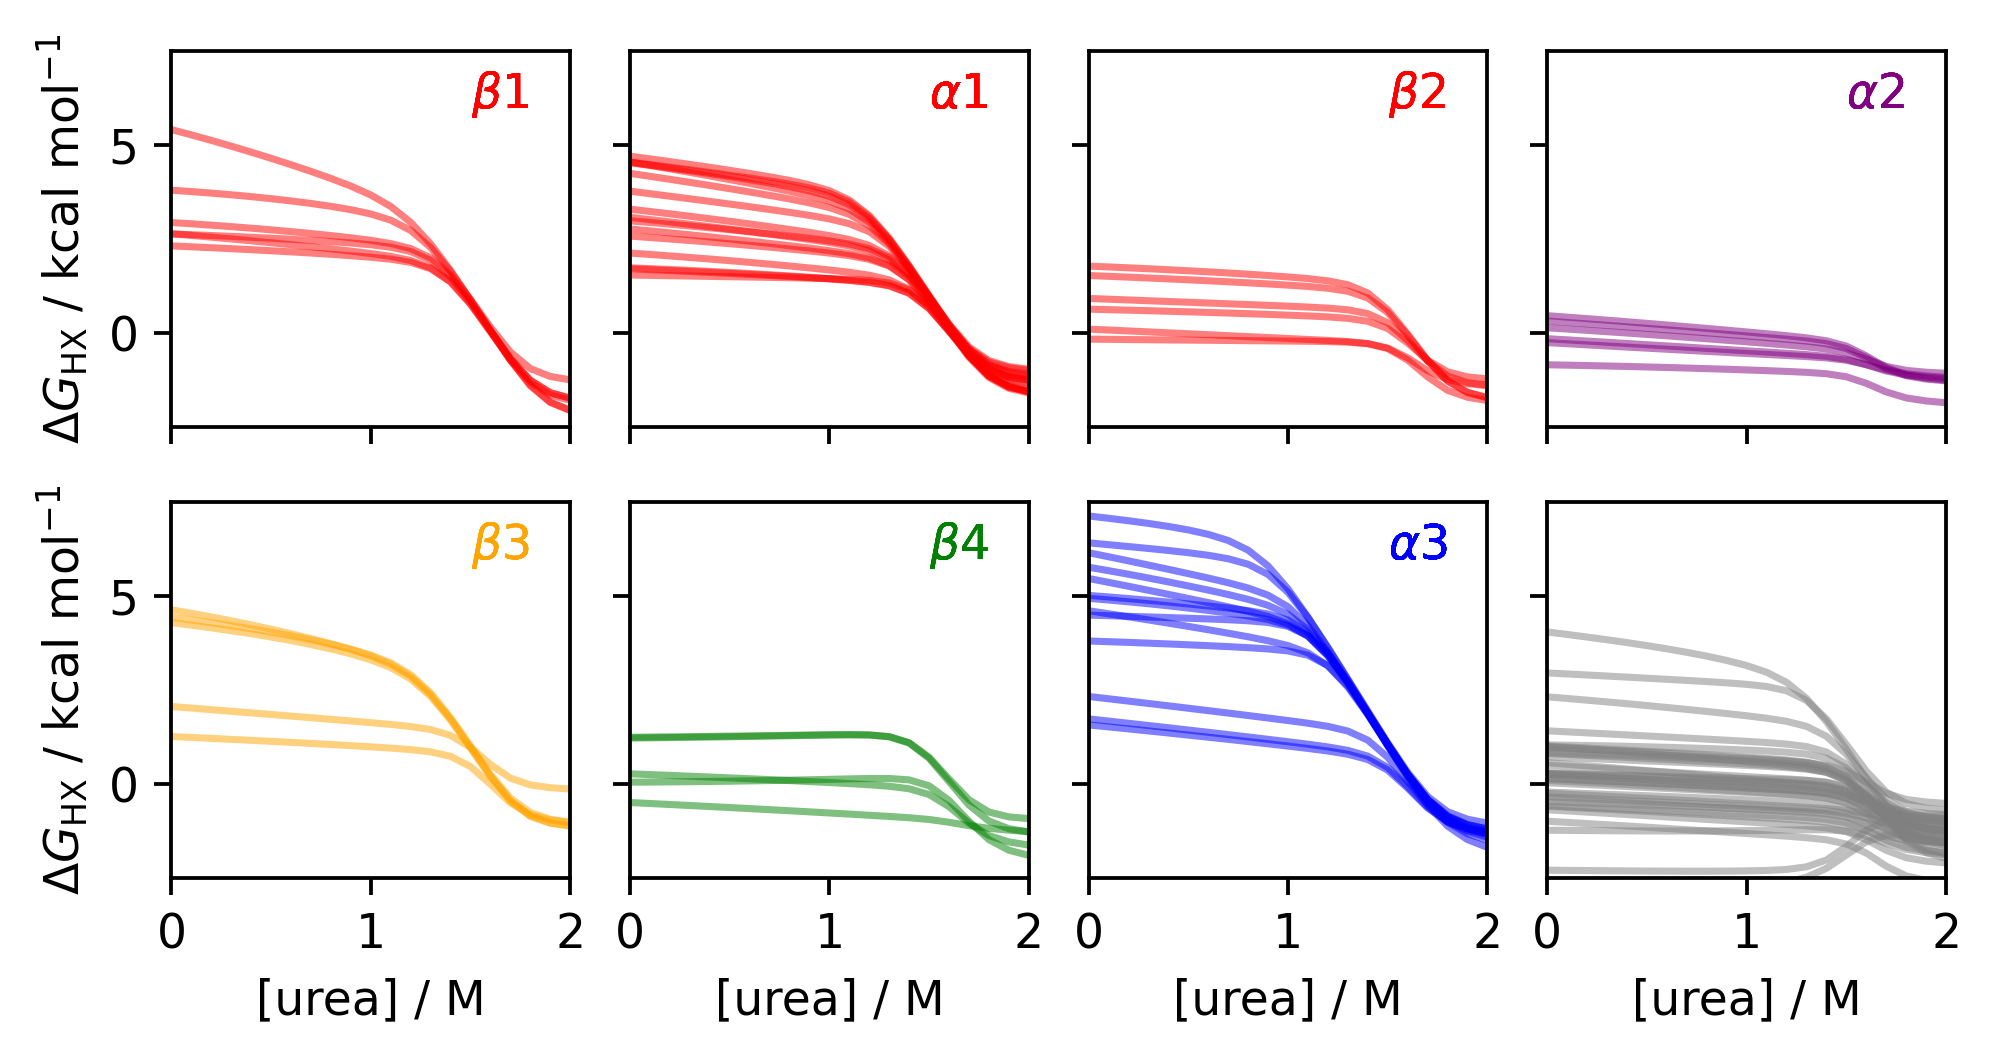

In [19]:
f, ax = plt.subplots(2, 4, figsize=(6,3), dpi=340, sharey=True, sharex=True, constrained_layout=True)
for i,r in enumerate(res):
    if r >=9 and r <=14:
        color='red'
        text = r'$\beta 1$'
        j, k = 0, 0
    elif r >=21 and r <= 35:
        color='red'
        text = r'$\alpha 1$'
        j, k = 0, 1
    elif r >=41 and r <=46:
        color='red'
        text = r'$\beta 2$'
        j, k = 0, 2
    elif r >= 50 and r <= 56:
        color = 'purple'
        text = r'$\alpha 2$'
        j, k = 0, 3
    elif r >=64 and r <=69:
        color='orange'
        text = r'$\beta 3$'
        j, k = 1, 0
    elif r >=73 and r <=77:
        color='green'
        text = r'$\beta 4$'
        j, k = 1, 1
    elif r >=84 and r <=96:
        color='blue' 
        text = r'$\alpha 3$'
        j, k = 1, 2
    else:
        text=''
        color = 'gray'
        j, k = 1, 3
    ax[j,k].plot(den, dGhx_D[:,i], color=color, alpha=0.5)
    ax[j,k].text(1.5, 6, text, color=color)

ax[0,0].set_xlim([0, 2])
ax[0,0].set_ylim([-2.5, 7.5])
for a in ax.flat:
    a.set_xlabel('[urea] / M')
    a.set_ylabel('$\Delta G_{\mathrm{HX}}$ / kcal mol$^{-1}$')
    a.label_outer()

<IPython.core.display.Javascript object>


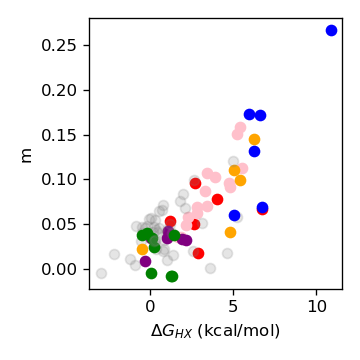

In [15]:
f1, ax1 = plt.subplots(figsize=(3,3), dpi=150)
for i,r in enumerate(res):
    if r >=8 and r <=13: 
        color='red'
        alpha=1
    elif r >=20 and r <= 34: 
        color='pink'
        alpha=1
    elif r >=40 and r <=45: 
        color='purple'
        alpha=1
    elif r >=61 and r <=66: 
        color='orange'
        alpha=1
    elif r >=71 and r <=79: 
        color='green'
        alpha=1
    elif r >=87 and r <=92: 
        color='blue'
        alpha=1
    else: 
        color='gray'
        alpha=0.2
    ax1.scatter(dGhx_D[0,i], mValue[0,i] ,color=color, alpha=alpha)
ax1.set_xlabel(r'$\Delta G_{HX}$ (kcal/mol)')
ax1.set_ylabel('m')
f1.tight_layout()

<IPython.core.display.Javascript object>


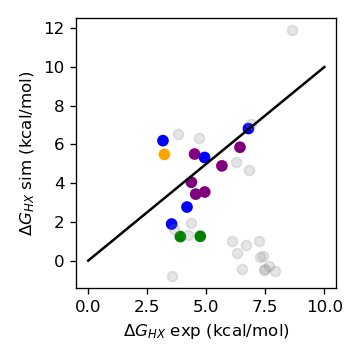

In [140]:
f1, ax1 = plt.subplots(figsize=(3,3), dpi=150)
in_ex2 = [25, 26, 27, 28, 29, 32,
          65,
          74, 76, 
          86, 91, 93, 95, 97]
ex2_colors = ['purple', 'purple','purple','purple','purple','purple',
              'orange',
              'green', 'green',
              'blue', 'blue', 'blue', 'blue', 'blue']
a_col = 2
temp_id = 12
a_in_region = np.isin(a_dgs[:,0], in_ex2)
a_dgs_trimmed = a_dgs[a_in_region]

g_in_region = np.isin(res+1, a_dgs_trimmed[:,0])
dGs_trimmed = dGhx_T.T[g_in_region]

a_other = a_dgs[~a_in_region]
dGs_other = dGhx_T.T[~g_in_region]

ax1.scatter(a_dgs_trimmed[:,a_col], dGs_trimmed[:,temp_id] ,color=ex2_colors, alpha=1)
ax1.scatter(a_other[:,a_col], dGs_other[:,temp_id], color='gray', alpha=0.2)

ax1.set_xlabel(r'$\Delta G_{HX}$ exp (kcal/mol)')
ax1.set_ylabel(r'$\Delta G_{HX}$ sim (kcal/mol)')
ax1.plot(np.linspace(0,10,10), np.linspace(0,10,10), 'k-')
f1.tight_layout()

In [16]:
in_ex2 = [25, 26, 27, 28, 29, 32,
          65,
          74, 76, 
          86, 91, 93, 95, 97]

# in_a1 = np.logical_and(a_dgs[:,0]>=21, a_dgs[:,0]<=35)
# in_a3 = np.logical_and(a_dgs[:,0]>=88, a_dgs[:,0]<=93)
# in_b4 = np.logical_and(a_dgs[:,0]>=72, a_dgs[:,0]<=80)
#in_region = np.logical_or(in_b4, np.logical_or(in_a1, in_a3))

in_region = np.isin(a_dgs[:,0], in_ex2)
a_dgs_trimmed = a_dgs[np.logical_and(in_region, ~np.logical_or(np.isnan(a_dgs[:,1]), np.isnan(a_dgs[:,2])))]
#print(a_dgs_trimmed)
#print(dGhx_T[0, np.isin(res+1,a_dgs_trimmed[:,0])])
r1s = []
r2s = []
for i,dG in enumerate(dGhx_T):
    dG_trimmed = dG[np.isin(res+1,a_dgs_trimmed[:,0])]
    r1, p1 = sps.pearsonr(dG_trimmed, a_dgs_trimmed[:,1])
    r2, p2 = sps.pearsonr(dG_trimmed, a_dgs_trimmed[:,2])
    res1 = (np.sum((dG_trimmed - a_dgs_trimmed[:,1])**2)/float(len(dG_trimmed)))**0.5
    res2 = (np.sum((dG_trimmed - a_dgs_trimmed[:,2])**2)/float(len(dG_trimmed)))**0.5
    r1s.append([r1, res1])
    r2s.append([r2, res2])
    print(i, r1, res1, r2, res2)
    


0 0.05670262469747286 2.3296148463487616 0.32149066940943527 1.882356886187517
1 0.05659629832270019 2.265746944130818 0.3179041236020793 1.8336457276725973
2 0.05579164583764292 2.210616165132951 0.31362492628836425 1.7937318643054083
3 0.05426398630083471 2.1633223428033608 0.30865171527483237 1.761636661168982
4 0.05205661355438642 2.1228456096572708 0.30304531027442755 1.736315217677257
5 0.049297179677225855 2.088061952763237 0.296933220484584 1.7166855725927732
6 0.04619902924335776 2.0577763561109754 0.2904988333101345 1.7016720561941974
7 0.043044111067722914 2.030774206344838 0.2839536861696837 1.6902635940217638
8 0.04015103800443528 2.0058972356891562 0.27750019847738083 1.6815859083823637
9 0.03783371896663074 1.9821247610500063 0.2712937527809769 1.6749685405590846
10 0.03635801375316546 1.9586537930688277 0.2654174852812342 1.669992506294181
11 0.035901977665710724 1.9349638896630827 0.2598770441688842 1.6665046031985438
12 0.03652531406030384 1.9108580993986621 0.2546149

# Let's do data for FS (trans)

In [17]:
#Define starting variables

pdb_id      = 'fs_almut'
start_frame = 2000
work_dir         = '/project/dinner/aanto/kaiB/up2/20220218_al_repex/run_0'
n_rep            = 48     # replica number
input_dir  = "{}/inputs".format(work_dir)
result_dir = "{}/results".format(work_dir)

In [18]:
Pot = []
Rg  = []
Rmsd = []
Hb = []
Ts = []
T  = []
PS = []
for i in range(n_rep):
    j=str(i).zfill(2)
    Pot.append(  np.load('{}/{}_{}_Energy.npy'.format(result_dir, pdb_id, j))[:,0] ) 
    Rg.append(   np.load('{}/{}_{}_Rg.npy'    .format(result_dir, pdb_id, j)) ) 
    Hb.append(   np.load('{}/{}_{}_Hbond.npy' .format(result_dir, pdb_id, j)) ) 
    Rmsd.append( np.load('{}/{}_{}_Rmsd.npy'  .format(result_dir, pdb_id, j)) ) 
    PS.append( np.load('{}/{}_{}_PS.npy'  .format(result_dir, pdb_id, j)) ) 

    t = np.load( '{}/{}_{}_T.npy'.format(result_dir, pdb_id, j) )
    nsize = Pot[-1].size
    Ts.append(np.zeros(nsize) + t )
    T.append(t)
    
Rmsd = np.array(Rmsd)
Pot  = np.array(Pot)
Rg   = np.array(Rg)
Hb   = np.array(Hb)
Ts   = np.array(Ts)
T    = np.array(T)
PS   = np.array(PS)

res = np.loadtxt('{}/{}.resid'.format(result_dir, pdb_id), dtype=int)
n_res = res.size

print(PS.shape)

(48, 19999, 91)


# MBAR

In [19]:
kB   = 1.0 # upside unit
T    = np.array(T)
beta = kB*T**(-1)

cE0 = Pot[:,start_frame:]

FN           = cE0[0].size
FNs          = np.zeros([n_rep], np.int32) + FN
reducedPot0  = np.zeros([n_rep,n_rep,FN], np.float32)
for k in range(n_rep):
    for l in range(n_rep):
        reducedPot0[k,l] = beta[l] * cE0[k]
mbar0 = pymbar.MBAR(reducedPot0, FNs, verbose=True)

K (total states) = 48, total samples = 863952
N_k = 
[17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999
 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999
 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999
 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999]
There are 48 states with samples.
Initializing free energies to zero.
Initial dimensionless free energies with method zeros
f_k = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Determining dimensionless free energies by Newton-Raphson / self-consistent iteration.
self consistent iteration gradient norm is 3.3669e+10, Newton-Raphson gradient norm is 2.2666e+10
Choosing self-consistent iteration on iteration 0
self consistent iteration gradient norm is 1.5804e+10, Newton-Raphson gradient norm is 1.1367e+10
Choosing self-consistent iteration for lowe

# Calculate dG_HX at different Ts

In [20]:
dGhx_Tt = []
for k in range(T.size):
    t = T[k]
    tt = t/0.85*298.

    u_n = (cE0/(t*kB)).flatten()
    log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
    w1 = np.exp(log_w1)
    w1 /= np.sum(w1)

    dG = np.zeros(n_res)
    for r in range(n_res):
        pf_i = PS[:,start_frame:,r].flatten()
        mean_pf = np.average(pf_i, weights=w1)
        if mean_pf == 1:
            print(k, r)
            dG[r] = 1000.
        else:
            dG[r] = 0.001987*tt*np.log((mean_pf/(1.-mean_pf)))
    dGhx_Tt.append(dG)
dGhx_Tt = np.array(dGhx_Tt)

<IPython.core.display.Javascript object>


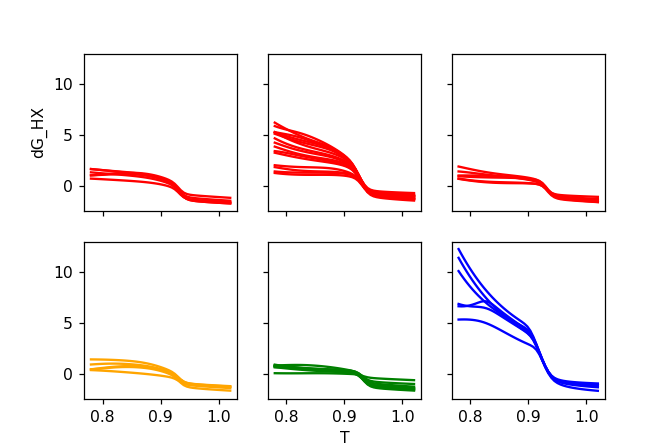

<IPython.core.display.Javascript object>


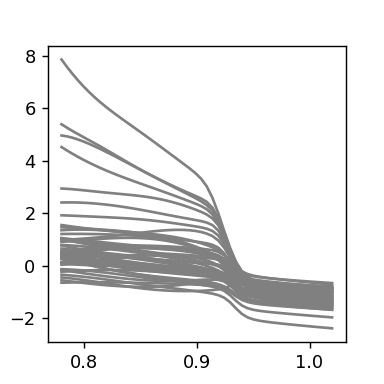

Text(0, 0.5, 'dG_HX')

In [48]:
f, ax = plt.subplots(2,3, figsize=(6,4), dpi=140, sharey=True, sharex=True)
f1, ax1 = plt.subplots(figsize=(3,3), dpi=160)
for i,r in enumerate(res):
    if r >=8 and r <=13:
        j=0
        k=0
        color='red'
    elif r >=20 and r <= 34:
        j=0
        k=1
        color='red'
    elif r >=40 and r <=45:
        j=0
        k=2
        color='red'
    elif r >=61 and r <=66:
        j=1
        k=0
        color='orange'
    elif r >=71 and r <=79:
        j=1
        k=1
        color='green'
    elif r >=87 and r <=92:
        j=1
        k=2
        color='blue'
    else:
        ax1.plot(T, dGhx_Tt[:,i],color='gray')
        continue
    ax[j,k].plot(T, dGhx_Tt[:,i],color=color)
ax[1,1].set_xlabel('T')
ax[0,0].set_ylabel('dG_HX')


# Calculate dG_HX at different denaturant concentrations

In [43]:
T_target = 0.85   # the T you want to use 
m_sens   = 0.04  # it is the sensitivity of the denaturant.
                 # a larger value means a lower concentration 
                 # to unfold the protein
                 # 0.05 is a not bad initial guess for urea

# the number of protected residues in evergy frame
pf_frame = np.sum(PS[:,start_frame:,:], axis=2).flatten()

# [den]
den_min = 0.0
den_max = 10
den_bin = 100
den  = np.linspace(den_min, den_max, den_bin+1)

# reweight to T_target
TT = T_target/0.85*298
m = m_sens*-pf_frame # 
u_n    = (cE0/(T_target*kB)).flatten()
log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
w1     = np.exp(log_w1)
w1    /= np.sum(w1)

# dG at different [den]
dGhx_D = []
for d in den:
    w  = np.exp(m*d/T_target)*w1
    w /= np.sum(w)
    
    probp = np.zeros(n_res)
    for j in range(n_res):
        pf_i = PS[:,start_frame:,j].flatten()
        probp[j] = np.sum(pf_i*w)
    probu = 1. - probp
    dGhx_D.append(TT*np.log(probp/probu)*0.001987)
dGhx_D = np.array(dGhx_D)

# m-value: the slope of dG vs [den]
mValue = np.diff(dGhx_D, axis=0)/(den[0]-den[1])

Text(0, 0.5, '$\\Delta G_{HX}$ (kcal/mol)')

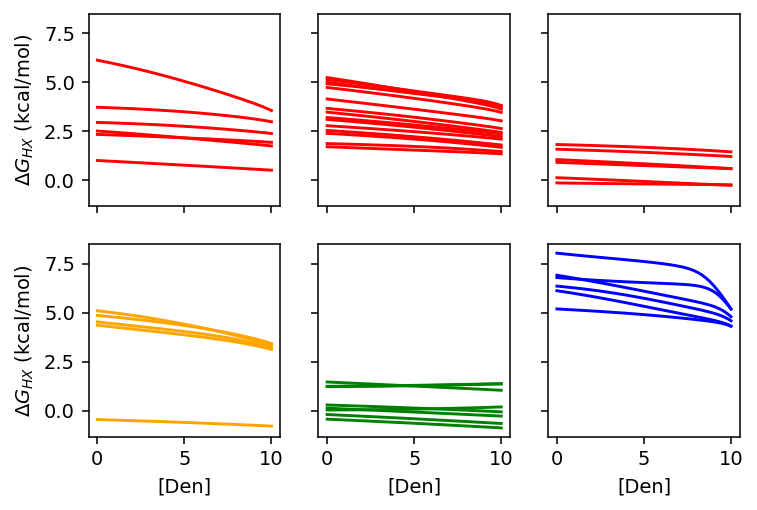

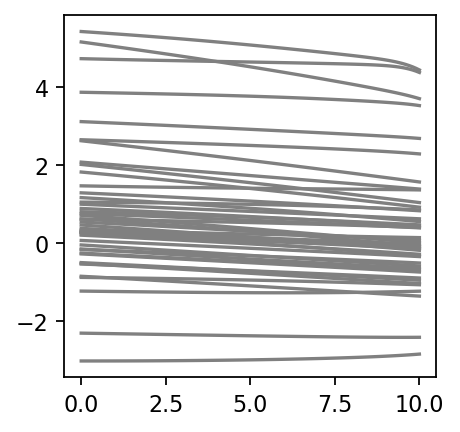

In [44]:
f, ax = plt.subplots(2,3, figsize=(6,4), dpi=140, sharey=True, sharex=True)
f1, ax1 = plt.subplots(figsize=(3,3), dpi=160)
for i,r in enumerate(res):
    if r >=8 and r <=13:
        j=0
        k=0
        color='red'
    elif r >=20 and r <= 34:
        j=0
        k=1
        color='red'
    elif r >=40 and r <=45:
        j=0
        k=2
        color='red'
    elif r >=61 and r <=66:
        j=1
        k=0
        color='orange'
    elif r >=71 and r <=79:
        j=1
        k=1
        color='green'
    elif r >=87 and r <=92:
        j=1
        k=2
        color='blue'
    else:
        ax1.plot(den, dGhx_D[:,i], color='gray')
        continue
    ax[j,k].plot(den, dGhx_D[:,i],color=color)
ax[1,0].set_xlabel('[Den]')
ax[1,1].set_xlabel('[Den]')
ax[1,2].set_xlabel('[Den]')
ax[0,0].set_ylabel(r'$\Delta G_{HX}$ (kcal/mol)')
ax[1,0].set_ylabel(r'$\Delta G_{HX}$ (kcal/mol)')

<IPython.core.display.Javascript object>


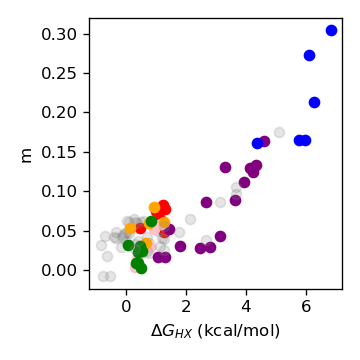

In [51]:
f1, ax1 = plt.subplots(figsize=(3,3), dpi=150)
for i,r in enumerate(res):
    if r >=8 and r <=13: 
        color='red'
        alpha=1
    elif r >=20 and r <= 34: 
        color='purple'
        alpha=1
    elif r >=40 and r <=45: 
        color='pink'
        alpha=1
    elif r >=61 and r <=66: 
        color='orange'
        alpha=1
    elif r >=71 and r <=79: 
        color='green'
        alpha=1
    elif r >=87 and r <=92: 
        color='blue'
        alpha=1
    else: 
        color='gray'
        alpha=0.2
    ax1.scatter(dGhx_D[0,i], mValue[0,i] ,color=color, alpha=alpha)
ax1.set_xlabel(r'$\Delta G_{HX}$ (kcal/mol)')
ax1.set_ylabel('m')
f1.tight_layout()

<IPython.core.display.Javascript object>


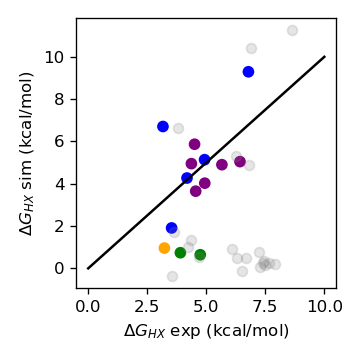

In [147]:
f1, ax1 = plt.subplots(figsize=(3,3), dpi=150)
in_ex2 = [25, 26, 27, 28, 29, 32,
          65,
          74, 76, 
          86, 91, 93, 95, 97]
ex2_colors = ['purple', 'purple','purple','purple','purple','purple',
              'orange',
              'green', 'green',
              'blue', 'blue', 'blue', 'blue', 'blue']
a_col = 2
temp_id = 2
a_in_region = np.isin(a_dgs[:,0], in_ex2)
a_dgs_trimmed = a_dgs[a_in_region]

g_in_region = np.isin(res+1, a_dgs_trimmed[:,0])
dGs_trimmed = dGhx_Tt.T[g_in_region]

a_other = a_dgs[~a_in_region]
dGs_other = dGhx_Tt.T[~g_in_region]

ax1.scatter(a_dgs_trimmed[:,a_col], dGs_trimmed[:,temp_id] ,color=ex2_colors, alpha=1)
ax1.scatter(a_other[:,a_col], dGs_other[:,temp_id], color='gray', alpha=0.2)

ax1.set_xlabel(r'$\Delta G_{HX}$ exp (kcal/mol)')
ax1.set_ylabel(r'$\Delta G_{HX}$ sim (kcal/mol)')
ax1.plot(np.linspace(0,10,10), np.linspace(0,10,10), 'k-')
f1.tight_layout()

In [142]:
in_ex2 = [25, 26, 27, 28, 29, 32,
          65,
          74, 76, 
          86, 91, 93, 95, 97]

# in_a1 = np.logical_and(a_dgs[:,0]>=21, a_dgs[:,0]<=35)
# in_a3 = np.logical_and(a_dgs[:,0]>=88, a_dgs[:,0]<=93)
# in_b4 = np.logical_and(a_dgs[:,0]>=72, a_dgs[:,0]<=80)
#in_region = np.logical_or(in_b4, np.logical_or(in_a1, in_a3))

in_region = np.isin(a_dgs[:,0], in_ex2)
a_dgs_trimmed = a_dgs[np.logical_and(in_region, ~np.logical_or(np.isnan(a_dgs[:,1]), np.isnan(a_dgs[:,2])))]
#print(a_dgs_trimmed)
#print(dGhx_T[0, np.isin(res+1,a_dgs_trimmed[:,0])])
r1s = []
r2s = []
for i,dG in enumerate(dGhx_Tt):
    dG_trimmed = dG[np.isin(res+1,a_dgs_trimmed[:,0])]
    r1, p1 = sps.pearsonr(dG_trimmed, a_dgs_trimmed[:,1])
    r2, p2 = sps.pearsonr(dG_trimmed, a_dgs_trimmed[:,2])
    res1 = (np.sum((dG_trimmed - a_dgs_trimmed[:,1])**2)/float(len(dG_trimmed)))**0.5
    res2 = (np.sum((dG_trimmed - a_dgs_trimmed[:,2])**2)/float(len(dG_trimmed)))**0.5
    r1s.append([r1, res1])
    r2s.append([r2, res2])
    print(i, r1, res1, r2, res2)
    


0 -0.25352230528616665 2.4333915840629183 0.4010168616527015 1.791661258008675
1 -0.24902446470314735 2.3906132586805655 0.39741124139503825 1.7811921339150059
2 -0.24510119043295905 2.35499880084672 0.3914720671789363 1.779892975952466
3 -0.24159251161101333 2.326000405250442 0.38330634281527204 1.786780688763689
4 -0.23822562392250818 2.3029068620924567 0.3732234471302617 1.8006402813415314
5 -0.2346862019591023 2.284837449666663 0.3617281014080318 1.8200520276120806
6 -0.23069468495164708 2.2707330117258935 0.349522148672191 1.8434040430905028
7 -0.2260658651797469 2.2593456200527053 0.33751397746432893 1.8688979667204038
8 -0.22073718323145308 2.249273856928187 0.32680280218956115 1.8946055167787952
9 -0.214757503487807 2.2391324270128243 0.31856114519663814 1.9187033918716394
10 -0.20824439895078184 2.227916879733622 0.31376919619411636 1.9399374726975656
11 -0.20133513197455533 2.2154081650577067 0.3128908525187929 1.958103625752347
12 -0.1941617052478372 2.202275866541445 0.3157

# Let's do data for FS (isomerization allowed)

In [103]:
#Define starting variables

pdb_id      = 'fs_almut'
start_frame = 2000
work_dir         = '/project/dinner/aanto/kaiB/up2/20220218_al1_repex_iso/run_0'
n_rep            = 48     # replica number
input_dir  = "{}/inputs".format(work_dir)
result_dir = "{}/results".format(work_dir)

In [104]:
Pot = []
Rg  = []
Rmsd = []
Hb = []
Ts = []
T  = []
PS = []
for i in range(n_rep):
    j=str(i).zfill(2)
    Pot.append(  np.load('{}/{}_{}_Energy.npy'.format(result_dir, pdb_id, j))[:,0] ) 
    Rg.append(   np.load('{}/{}_{}_Rg.npy'    .format(result_dir, pdb_id, j)) ) 
    Hb.append(   np.load('{}/{}_{}_Hbond.npy' .format(result_dir, pdb_id, j)) ) 
    Rmsd.append( np.load('{}/{}_{}_Rmsd.npy'  .format(result_dir, pdb_id, j)) ) 
    PS.append( np.load('{}/{}_{}_PS.npy'  .format(result_dir, pdb_id, j)) ) 

    t = np.load( '{}/{}_{}_T.npy'.format(result_dir, pdb_id, j) )
    nsize = Pot[-1].size
    Ts.append(np.zeros(nsize) + t )
    T.append(t)
    
Rmsd = np.array(Rmsd)
Pot  = np.array(Pot)
Rg   = np.array(Rg)
Hb   = np.array(Hb)
Ts   = np.array(Ts)
T    = np.array(T)
PS   = np.array(PS)

res = np.loadtxt('{}/{}.resid'.format(result_dir, pdb_id), dtype=int)
n_res = res.size

print(PS.shape)

(48, 19999, 91)


# MBAR

In [105]:
kB   = 1.0 # upside unit
T    = np.array(T)
beta = kB*T**(-1)

cE0 = Pot[:,start_frame:]

FN           = cE0[0].size
FNs          = np.zeros([n_rep], np.int32) + FN
reducedPot0  = np.zeros([n_rep,n_rep,FN], np.float32)
for k in range(n_rep):
    for l in range(n_rep):
        reducedPot0[k,l] = beta[l] * cE0[k]
mbar0 = pymbar.MBAR(reducedPot0, FNs, verbose=True)

K (total states) = 48, total samples = 863952
N_k = 
[17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999
 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999
 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999
 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999 17999]
There are 48 states with samples.
Initializing free energies to zero.
Initial dimensionless free energies with method zeros
f_k = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Determining dimensionless free energies by Newton-Raphson / self-consistent iteration.
self consistent iteration gradient norm is 3.3329e+10, Newton-Raphson gradient norm is 3.2833e+10
Choosing self-consistent iteration on iteration 0
self consistent iteration gradient norm is  1.534e+10, Newton-Raphson gradient norm is 1.5307e+10
Choosing self-consistent iteration for lowe

# Calculate dG_HX at different Ts

In [106]:
dGhx_Ti = []
for k in range(T.size):
    t = T[k]
    tt = t/0.85*298.

    u_n = (cE0/(t*kB)).flatten()
    log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
    w1 = np.exp(log_w1)
    w1 /= np.sum(w1)

    dG = np.zeros(n_res)
    for r in range(n_res):
        pf_i = PS[:,start_frame:,r].flatten()
        mean_pf = np.average(pf_i, weights=w1)
        if mean_pf == 1:
            print(k, r)
            dG[r] = 1000.
        else:
            dG[r] = 0.001987*tt*np.log((mean_pf/(1.-mean_pf)))
    dGhx_Ti.append(dG)
dGhx_Ti = np.array(dGhx_Ti)

0 81
1 81
2 81
3 81
5 81


<IPython.core.display.Javascript object>


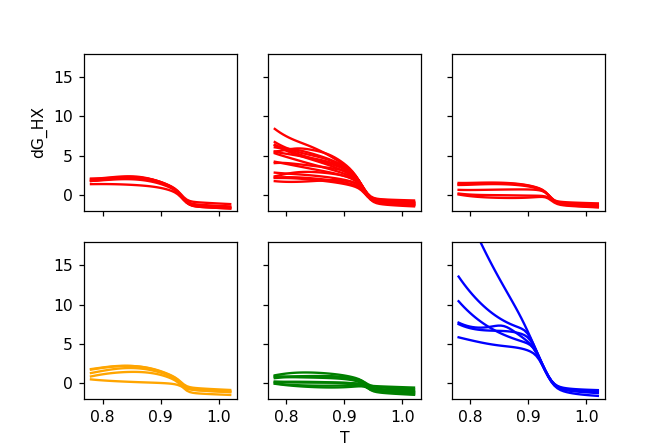

<IPython.core.display.Javascript object>


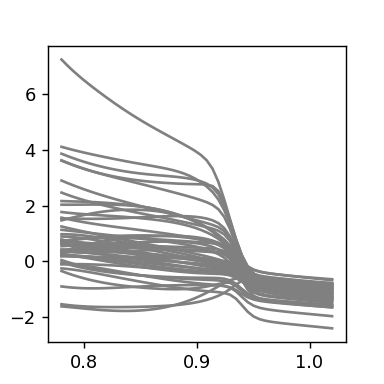

In [64]:
f, ax = plt.subplots(2,3, figsize=(6,4), dpi=140, sharey=True, sharex=True)
f1, ax1 = plt.subplots(figsize=(3,3), dpi=160)
for i,r in enumerate(res):
    if r >=8 and r <=13:
        j=0
        k=0
        color='red'
    elif r >=20 and r <= 34:
        j=0
        k=1
        color='red'
    elif r >=40 and r <=45:
        j=0
        k=2
        color='red'
    elif r >=61 and r <=66:
        j=1
        k=0
        color='orange'
    elif r >=71 and r <=79:
        j=1
        k=1
        color='green'
    elif r >=87 and r <=92:
        j=1
        k=2
        color='blue'
    else:
        ax1.plot(T, dGhx_Ti[:,i],color='gray')
        continue
    ax[j,k].plot(T, dGhx_Ti[:,i],color=color)
ax[1,1].set_xlabel('T')
ax[0,0].set_ylabel('dG_HX')
for axis in ax.ravel():
    axis.set_ylim((-2,18))


# Calculate dG_HX at different denaturant concentrations

In [65]:
T_target = 0.85   # the T you want to use 
m_sens   = 0.04  # it is the sensitivity of the denaturant.
                 # a larger value means a lower concentration 
                 # to unfold the protein
                 # 0.05 is a not bad initial guess for urea

# the number of protected residues in evergy frame
pf_frame = np.sum(PS[:,start_frame:,:], axis=2).flatten()

# [den]
den_min = 0.0
den_max = 10
den_bin = 100
den  = np.linspace(den_min, den_max, den_bin+1)

# reweight to T_target
TT = T_target/0.85*298
m = m_sens*-pf_frame
u_n    = (cE0/(T_target*kB)).flatten()
log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
w1     = np.exp(log_w1)
w1    /= np.sum(w1)

# dG at different [den]
dGhx_D = []
for d in den:
    w  = np.exp(m*d/T_target)*w1
    w /= np.sum(w)
    
    probp = np.zeros(n_res)
    for j in range(n_res):
        pf_i = PS[:,start_frame:,j].flatten()
        probp[j] = np.sum(pf_i*w)
    probu = 1. - probp
    dGhx_D.append(TT*np.log(probp/probu)*0.001987)
dGhx_D = np.array(dGhx_D)

# m-value: the slope of dG vs [den]
mValue = np.diff(dGhx_D, axis=0)/(den[0]-den[1])

<IPython.core.display.Javascript object>


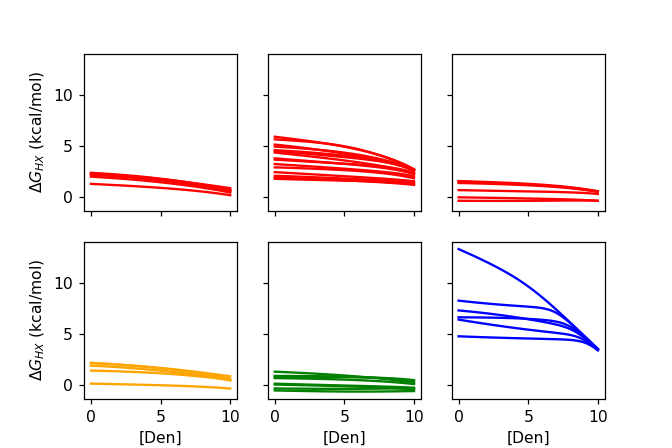

<IPython.core.display.Javascript object>


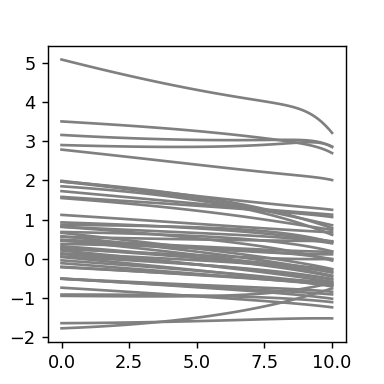

Text(0, 0.5, '$\\Delta G_{HX}$ (kcal/mol)')

In [66]:
f, ax = plt.subplots(2,3, figsize=(6,4), dpi=140, sharey=True, sharex=True)
f1, ax1 = plt.subplots(figsize=(3,3), dpi=160)
for i,r in enumerate(res):
    if r >=8 and r <=13:
        j=0
        k=0
        color='red'
    elif r >=20 and r <= 34:
        j=0
        k=1
        color='red'
    elif r >=40 and r <=45:
        j=0
        k=2
        color='red'
    elif r >=61 and r <=66:
        j=1
        k=0
        color='orange'
    elif r >=71 and r <=79:
        j=1
        k=1
        color='green'
    elif r >=87 and r <=92:
        j=1
        k=2
        color='blue'
    else:
        ax1.plot(den, dGhx_D[:,i], color='gray')
        continue
    ax[j,k].plot(den, dGhx_D[:,i],color=color)
ax[1,0].set_xlabel('[Den]')
ax[1,1].set_xlabel('[Den]')
ax[1,2].set_xlabel('[Den]')
ax[0,0].set_ylabel(r'$\Delta G_{HX}$ (kcal/mol)')
ax[1,0].set_ylabel(r'$\Delta G_{HX}$ (kcal/mol)')

<IPython.core.display.Javascript object>


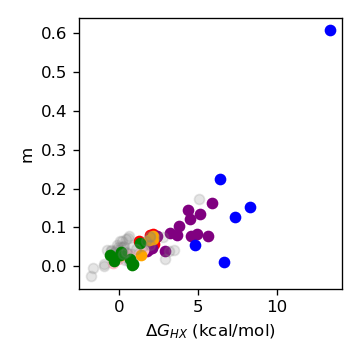

In [67]:
f1, ax1 = plt.subplots(figsize=(3,3), dpi=150)
for i,r in enumerate(res):
    if r >=8 and r <=13: 
        color='red'
        alpha=1
    elif r >=20 and r <= 34: 
        color='purple'
        alpha=1
    elif r >=40 and r <=45: 
        color='pink'
        alpha=1
    elif r >=61 and r <=66: 
        color='orange'
        alpha=1
    elif r >=71 and r <=79: 
        color='green'
        alpha=1
    elif r >=87 and r <=92: 
        color='blue'
        alpha=1
    else: 
        color='gray'
        alpha=0.2
    ax1.scatter(dGhx_D[0,i], mValue[0,i] ,color=color, alpha=alpha)
ax1.set_xlabel(r'$\Delta G_{HX}$ (kcal/mol)')
ax1.set_ylabel('m')
f1.tight_layout()

<IPython.core.display.Javascript object>


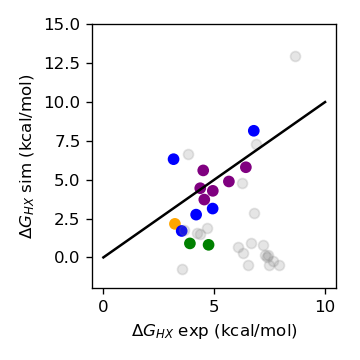

In [154]:
f1, ax1 = plt.subplots(figsize=(3,3), dpi=150)
in_ex2 = [25, 26, 27, 28, 29, 32,
          65,
          74, 76, 
          86, 91, 93, 95, 97]
ex2_colors = ['purple', 'purple','purple','purple','purple','purple',
              'orange',
              'green', 'green',
              'blue', 'blue', 'blue', 'blue', 'blue']
a_col = 2
temp_id = 15
a_in_region = np.isin(a_dgs[:,0], in_ex2)
a_dgs_trimmed = a_dgs[a_in_region]

g_in_region = np.isin(res+1, a_dgs_trimmed[:,0])
dGs_trimmed = dGhx_Ti.T[g_in_region]

a_other = a_dgs[~a_in_region]
dGs_other = dGhx_Ti.T[~g_in_region]

ax1.scatter(a_dgs_trimmed[:,a_col], dGs_trimmed[:,temp_id] ,color=ex2_colors, alpha=1)
ax1.scatter(a_other[:,a_col], dGs_other[:,temp_id], color='gray', alpha=0.2)
ax1.set_ylim((-2,15))

ax1.set_xlabel(r'$\Delta G_{HX}$ exp (kcal/mol)')
ax1.set_ylabel(r'$\Delta G_{HX}$ sim (kcal/mol)')
ax1.plot(np.linspace(0,10,10), np.linspace(0,10,10), 'k-')
f1.tight_layout()

In [20]:
in_ex2 = [25, 26, 27, 28, 29, 32,
          65,
          74, 76, 
          86, 91, 93, 95, 97]

# in_a1 = np.logical_and(a_dgs[:,0]>=21, a_dgs[:,0]<=35)
# in_a3 = np.logical_and(a_dgs[:,0]>=88, a_dgs[:,0]<=93)
# in_b4 = np.logical_and(a_dgs[:,0]>=72, a_dgs[:,0]<=80)
#in_region = np.logical_or(in_b4, np.logical_or(in_a1, in_a3))

in_region = np.isin(a_dgs[:,0], in_ex2)
a_dgs_trimmed = a_dgs[np.logical_and(in_region, ~np.logical_or(np.isnan(a_dgs[:,1]), np.isnan(a_dgs[:,2])))]
#print(a_dgs_trimmed)
#print(dGhx_T[0, np.isin(res+1,a_dgs_trimmed[:,0])])
r1s = []
r2s = []
for i,dG in enumerate(dGhx_Ti):
    dG_trimmed = dG[np.isin(res+1,a_dgs_trimmed[:,0])]
    r1, p1 = sps.pearsonr(dG_trimmed, a_dgs_trimmed[:,1])
    r2, p2 = sps.pearsonr(dG_trimmed, a_dgs_trimmed[:,2])
    res1 = (np.sum((dG_trimmed - a_dgs_trimmed[:,1])**2)/float(len(dG_trimmed)))**0.5
    res2 = (np.sum((dG_trimmed - a_dgs_trimmed[:,2])**2)/float(len(dG_trimmed)))**0.5
    r1s.append([r1, res1])
    r2s.append([r2, res2])
    print(i, r1, res1, r2, res2)
    


NameError: name 'dGhx_Ti' is not defined

# OK, let's combine FS and GS (locked) simulations to try to find if there is an ideal weighted average to replicate experimental results

In [163]:
in_ex2_1 = [9, 
            25, 26, 27, 28, 29, 32,
            40, 41, 
            48,
            65,
            74, 76, 
            86, 91, 93, 95, 97]

ex2_colors_1 = ['red',
                'purple', 'purple','purple','purple','purple','purple',
                'red', 'red',
                'red',
                'orange',
                'green', 'green',
                'blue', 'blue', 'blue', 'blue', 'blue']

percs = np.linspace(0,1,51)
in_region = np.isin(a_dgs[:,0], in_ex2_1)
a_dgs_trimmed = a_dgs[np.logical_and(in_region, ~np.logical_or(np.isnan(a_dgs[:,1]), np.isnan(a_dgs[:,2])))]

for i, (dg, dgt) in enumerate(zip(dGhx_T, dGhx_Tt)):
    r1s = []
    r2s = []
    for j in percs:
        dg_com = j* dg + (1-j)*dgt
        dG_trimmed = dg_com[np.isin(res+1,a_dgs_trimmed[:,0])]
        r1, p1 = sps.pearsonr(dG_trimmed, a_dgs_trimmed[:,1])
        r2, p2 = sps.pearsonr(dG_trimmed, a_dgs_trimmed[:,2])
        res1 = (np.sum((dG_trimmed - a_dgs_trimmed[:,1])**2)/float(len(dG_trimmed)))**0.5
        res2 = (np.sum((dG_trimmed - a_dgs_trimmed[:,2])**2)/float(len(dG_trimmed)))**0.5
        r1s.append([r1, res1])
        r2s.append([r2, res2])
        #print(j, r1, res1, r2, res2)
    r1s = np.array(r1s)
    r2s = np.array(r2s)
    b1 = np.argmin(r1s[:,1])
    b2 = np.argmin(r2s[:,1])
    print(i, T[i], percs[b1], r1s[b1], percs[b2], r2s[b2])

0 0.7799999713897705 0.58 [0.20472262 2.25004495] 0.5 [0.44782009 2.08945894]
1 0.7847716808319092 0.6 [0.20771735 2.21866058] 0.52 [0.44235097 2.08084436]
2 0.7895579934120178 0.62 [0.21018143 2.19222587] 0.54 [0.43590004 2.07639423]
3 0.7943587899208069 0.64 [0.21217308 2.17015579] 0.58 [0.42683805 2.07534028]
4 0.7991741299629211 0.66 [0.21378518 2.15181317] 0.6 [0.41893645 2.07706672]
5 0.8040040731430054 0.68 [0.21513921 2.13650538] 0.62 [0.41068562 2.08090841]
6 0.80884850025177 0.7000000000000001 [0.21637839 2.1234914 ] 0.66 [0.40069423 2.08603858]
7 0.8137075304985046 0.7000000000000001 [0.2149136  2.11197425] 0.68 [0.39272206 2.091958  ]
8 0.8185811042785645 0.72 [0.21647857 2.10121639] 0.72 [0.3836686  2.09802787]
9 0.8234692215919495 0.74 [0.21839616 2.09060016] 0.74 [0.37705453 2.1039059 ]
10 0.8283718824386597 0.76 [0.22076377 2.0797185 ] 0.76 [0.3712755  2.10950151]
11 0.8332890868186951 0.76 [0.22125194 2.0683336 ] 0.78 [0.366241   2.11496897]
12 0.8382208347320557 0.78 

- OK, so it looks like for the high pH data and with only some ex2, the best temp is T=0.79 with 52% cis high pH.
- Things get worse when you add in the other regions. Best we can do is low pH, T=0.87, 90% cis, or high pH, T=0.79, 58% cis

<IPython.core.display.Javascript object>


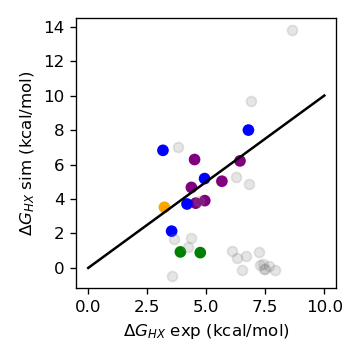

In [162]:
f1, ax1 = plt.subplots(figsize=(3,3), dpi=150)

a_col=2
temp_id= 3
cis_pct = 0.52

# a_col=1
# temp_id= 20
# cis_pct = 0.9

trans_pct = 1-cis_pct
res_trimmed = res[np.logical_and(res>=8, res<=98)]
dGhx_Tf = cis_pct*dGhx_T + trans_pct*dGhx_Tt

a_in_region = np.isin(a_dgs[:,0], in_ex2)
a_dgs_trimmed = a_dgs[a_in_region]

g_in_region = np.isin(res+1, a_dgs_trimmed[:,0])
dGs_trimmed = dGhx_Tf.T[g_in_region]

a_other = a_dgs[~a_in_region]
dGs_other = dGhx_Tf.T[~g_in_region]

ax1.scatter(a_dgs_trimmed[:,a_col], dGs_trimmed[:,temp_id] ,color=ex2_colors, alpha=1)
ax1.scatter(a_other[:,a_col], dGs_other[:,temp_id], color='gray', alpha=0.2)

ax1.set_xlabel(r'$\Delta G_{HX}$ exp (kcal/mol)')
ax1.set_ylabel(r'$\Delta G_{HX}$ sim (kcal/mol)')
ax1.plot(np.linspace(0,10,10), np.linspace(0,10,10), 'k-')
f1.tight_layout()

<IPython.core.display.Javascript object>


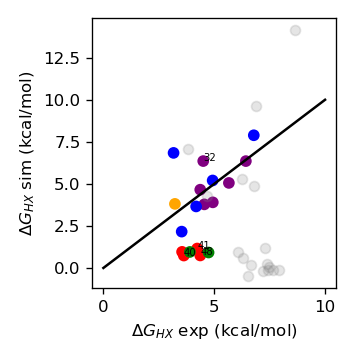

In [184]:
f1, ax1 = plt.subplots(figsize=(3,3), dpi=150)

a_col=2
temp_id= 3
cis_pct = 0.58

# a_col=1
# temp_id= 19
# cis_pct = 0.9

trans_pct = 1-cis_pct
res_trimmed = res[np.logical_and(res>=8, res<=98)]
dGhx_Tf = cis_pct*dGhx_T + trans_pct*dGhx_Tt

a_in_region = np.isin(a_dgs[:,0], in_ex2_1)
a_dgs_trimmed = a_dgs[a_in_region]

g_in_region = np.isin(res+1, a_dgs_trimmed[:,0])
dGs_trimmed = dGhx_Tf.T[g_in_region]

a_other = a_dgs[~a_in_region]
dGs_other = dGhx_Tf.T[~g_in_region]

ax1.scatter(a_dgs_trimmed[:,a_col], dGs_trimmed[:,temp_id] ,color=ex2_colors_1, alpha=1)
ax1.scatter(a_other[:,a_col], dGs_other[:,temp_id], color='gray', alpha=0.2)

ax1.set_xlabel(r'$\Delta G_{HX}$ exp (kcal/mol)')
ax1.set_ylabel(r'$\Delta G_{HX}$ sim (kcal/mol)')
ax1.plot(np.linspace(0,10,10), np.linspace(0,10,10), 'k-')

for i,(adg, dg) in enumerate(zip(a_dgs_trimmed[6:10], dGs_trimmed[6:10])):
    ax1.annotate(str(int(adg[0])), (adg[a_col], dg[temp_id]), fontsize=6)

f1.tight_layout()

<IPython.core.display.Javascript object>


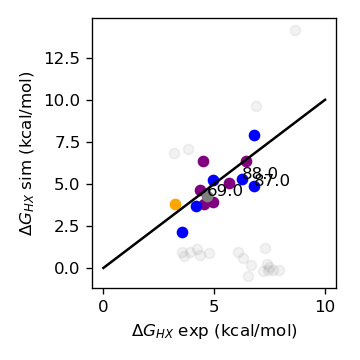

25.0
26.0
27.0
28.0
29.0
32.0
65.0
86.0
91.0
95.0
97.0
69.0
87.0
88.0


In [187]:
in_ex2_1 = [9, 
            25, 26, 27, 28, 29, 32,
            40, 41, 
            48,
            65,
            74, 76, 
            86, 91, 93, 95, 97]

ex2_colors_1 = ['red',
                'purple', 'purple','purple','purple','purple','purple',
                'red', 'red',
                'red',
                'orange',
                'green', 'green',
                'blue', 'blue', 'blue', 'blue', 'blue']

f1, ax1 = plt.subplots(figsize=(3,3), dpi=150)
for i,(adg, dg) in enumerate(zip(a_dgs_trimmed, dGs_trimmed)):
    r=adg[0] - 1
    err = np.abs(adg[a_col] - dg[temp_id]) 
    if err <= 2.0:
        print(adg[0])
        alpha=1
        if r >=8 and r <=13: 
            color='red'
        elif r >=20 and r <= 34: 
            color='purple'
        elif r >=40 and r <=48: 
            color='red'
        elif r >=61 and r <=66: 
            color='orange'
        elif r >=71 and r <=79: 
            color='green'
        elif r >=85 and r <=97: 
            color='blue'
        else: 
            color='gray'
        ax1.scatter(adg[a_col], dg[temp_id] ,color=color, alpha=alpha)
    else:
        ax1.scatter(adg[a_col], dg[temp_id] ,color='gray', alpha=0.1)
        
for i,(adg, dg) in enumerate(zip(a_other, dGs_other)):
    r=adg[0] - 1
    err = np.abs(adg[a_col] - dg[temp_id]) 
    if err <= 2.0:
        print(adg[0])
        alpha=1
        if r >=8 and r <=13: 
            color='red'
        elif r >=20 and r <= 34: 
            color='purple'
        elif r >=40 and r <=48: 
            color='red'
        elif r >=61 and r <=66: 
            color='orange'
        elif r >=71 and r <=79: 
            color='green'
        elif r >=85 and r <=97: 
            color='blue'
        else: 
            color='gray'
        ax1.scatter(adg[a_col], dg[temp_id] ,color=color, alpha=alpha)
        ax1.annotate(str(adg[0]), (adg[a_col], dg[temp_id]))
    else:
        ax1.scatter(adg[a_col], dg[temp_id] ,color='gray', alpha=0.1)
        
ax1.set_xlabel(r'$\Delta G_{HX}$ exp (kcal/mol)')
ax1.set_ylabel(r'$\Delta G_{HX}$ sim (kcal/mol)')
ax1.plot(np.linspace(0,10,10), np.linspace(0,10,10), 'k-')
f1.tight_layout()

# Let's repeat with the cleaned-up data from Sup


In [11]:
a_dg_file1 = '/project/dinner/aanto/kaiB/up2/dgs_al_45.csv'
a_dg_file2 = '/project/dinner/aanto/kaiB/up2/dgs_al_65.csv'
a_dgs1 = np.genfromtxt(a_dg_file1, delimiter=',')
a_dgs2 = np.genfromtxt(a_dg_file2, delimiter=',')

In [12]:
in_region1 = a_dgs1[:,-2].astype(bool)
in_region2 = a_dgs2[:,-2].astype(bool)
a_dgs1_trimmed = a_dgs1[in_region1]
a_dgs2_trimmed = a_dgs2[in_region2]

r1s = []
r2s = []
for i,dG in enumerate(dGhx_T):
    dG_trimmed1 = dG[np.isin(res+1,a_dgs1_trimmed[:,-1].astype(int))]
    dG_trimmed2 = dG[np.isin(res+1,a_dgs2_trimmed[:,-1].astype(int))]
    r1, p1 = sps.pearsonr(dG_trimmed1, a_dgs1_trimmed[:,4])
    r2, p2 = sps.pearsonr(dG_trimmed2, a_dgs2_trimmed[:,4])
    res1 = (np.sum((dG_trimmed1 - a_dgs1_trimmed[:,4])**2)/float(len(dG_trimmed1)))**0.5
    res2 = (np.sum((dG_trimmed2 - a_dgs2_trimmed[:,4])**2)/float(len(dG_trimmed2)))**0.5
    r1s.append([r1, res1])
    r2s.append([r2, res2])
    print(i, r1, res1, r2, res2)

0 0.42202471703821864 2.2323470491861133 0.4469386430803388 2.2587654925381146
1 0.41584855788697844 2.1859806243135367 0.4368298476511045 2.22800483358631
2 0.4096029896948619 2.1466193517298797 0.42670303539649046 2.203699771780645
3 0.40346262022060686 2.113007267321749 0.41694593532232377 2.1844147322096528
4 0.3976202567473076 2.0837946702694516 0.4079589811892776 2.168685137055723
5 0.39222942942213657 2.0577539776145857 0.4000521800442426 2.155254053576692
6 0.38735391947861086 2.0339703583107442 0.3933586227287304 2.143270240610648
7 0.38295864246132383 2.0118687350411055 0.3878251716531629 2.132301076717553
8 0.37894672103066745 1.99107971517123 0.3832844925010488 2.1221668276875
9 0.3752116312072196 1.9712653015604364 0.3795502964401529 2.112737106894237
10 0.3716761081270449 1.9520257278261168 0.37648527083485667 2.1038173239026663
11 0.36830714637180995 1.932912778766856 0.3740257768352585 2.0951499196055217
12 0.36511016687565867 1.9135181868528157 0.37217148215404605 2.08

<IPython.core.display.Javascript object>


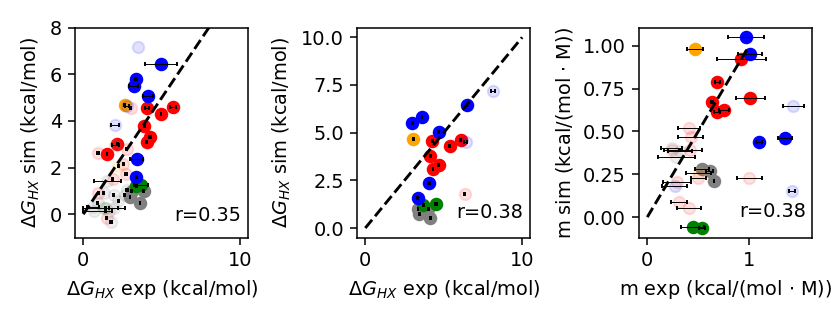

/project/dinner/aanto/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


In [53]:
f1, ax1 = plt.subplots(1,3, figsize=(6,2.3), dpi=155, sharey=False, sharex=False)
temp_id = 19

dG = dGhx_T[temp_id]
dGs1= dG[np.isin(res+1,a_dgs1[:,-1].astype(int))]
dGs2= dG[np.isin(res+1,a_dgs2[:,-1].astype(int))]

colors1 = color_arr[np.isin(np.arange(1,100),a_dgs1[:,-1].astype(int))]
colors2 = color_arr[np.isin(np.arange(1,100),a_dgs2[:,-1].astype(int))]

alphas1 = alpha_arr[np.isin(np.arange(1,100),a_dgs1[:,-1].astype(int))]
alphas2 = alpha_arr[np.isin(np.arange(1,100),a_dgs2[:,-1].astype(int))]

for adg, adge, dg, c, a, rid in zip(a_dgs1[:,4], a_dgs1[:,6], dGs1, colors1, alphas1, a_dgs1[:,-1]):
    ax1[0]. scatter(adg, dg, color=c, alpha=a[0])
    ax1[0].errorbar(adg, dg, xerr=adge, ecolor='black', fmt='none',elinewidth=0.5,capsize=1)
#     if a[0] == 1:
#         ax1[0].annotate(str(int(rid)), (adg, dg))
    
for adg, adge, dg, c, a, rid in zip(a_dgs2[:,4], a_dgs2[:,6], dGs2, colors2, alphas2, a_dgs2[:,-1]):
    ax1[1]. scatter(adg, dg, color=c, alpha=a[1])
    ax1[1].errorbar(adg, dg, xerr=adge, ecolor='black', fmt='none',elinewidth=0.5,capsize=1)
#     if a[1] == 1:
#         ax1[1].annotate(str(int(rid)), (adg, dg))

ax1[0].set_xlabel(r'$\Delta G_{HX}$ exp (kcal/mol)', fontsize=10)
ax1[1].set_xlabel(r'$\Delta G_{HX}$ exp (kcal/mol)')
ax1[0].set_ylabel(r'$\Delta G_{HX}$ sim (kcal/mol)')
ax1[1].set_ylabel(r'$\Delta G_{HX}$ sim (kcal/mol)')
ax1[0].plot(np.linspace(0,10,10), np.linspace(0,10,10), 'k--')
ax1[1].plot(np.linspace(0,10,10), np.linspace(0,10,10), 'k--')
# ax1[0].set_title('pH=4.5')
# ax1[1].set_title('pH=6.5')

# ax1[0].annotate('r={:.2f}\nRMSE={:.2f}'.format(r1s[temp_id][0], r1s[temp_id][1]),(6,0))
# ax1[1].annotate('r={:.2f}\nRMSE={:.2f}'.format(r2s[temp_id][0], r2s[temp_id][1]),(6,0))
# ax1[0].annotate('r={:.2f}'.format(r1s[temp_id][0]),(6,-0.3))
# ax1[1].annotate('r={:.2f}'.format(r2s[temp_id][0]),(6,0.5))
ax1[0].annotate('r=0.35',(5.8,-0.3))
ax1[1].annotate('r=0.38',(5.8,0.5))
ax1[2].annotate('r=0.38',(0.9,0))
ax1[0].set_ylim((-1,8))

colors1 = color_arr[np.isin(np.arange(1,100),a_ms[:,-1].astype(int))]
alphas1 = alpha_arr[np.isin(np.arange(1,100),a_ms[:,-1].astype(int))]

for adg, adge, dg, c, a, rid in zip(a_ms[:,3]/4.184, a_ms[:,5]/4.184, mVs[model_id], colors1, alphas1, a_ms[:,-1]):
    ax1[2].scatter(adg, dg, color=c, alpha=a[2])
    ax1[2].errorbar(adg, dg, xerr=adge, ecolor='black', fmt='none',elinewidth=0.5,capsize=1)
    
ax1[2].set_xlabel(r'm exp (kcal/(mol $\cdot$ M))')
ax1[2].set_ylabel(r'm sim (kcal/(mol $\cdot$ M))')
ax1[2].plot(np.linspace(0,1,10), np.linspace(0,1,10), 'k--')
# ax1.set_title('T={:.3f}, s={:.2f}'.format(T_targets[T_id], m_senss[msens_id]))

f1.tight_layout()
f1.savefig('figs/almut_HX_new.png', dpi=300)

### What about comparing to the m-values

In [37]:
mValues = []
# T_targets = np.linspace(0.8,0.9,5)
# m_senss = np.linspace(0.05,0.4,8)

T_targets = [0.87]
m_senss = [0.25]
for T_target in T_targets:
    for m_sens in m_senss:
        #T_target = 0.87   # the T you want to use 
        #m_sens   = 0.2  # it is the sensitivity of the denaturant.
                         # a larger value means a lower concentration 
                         # to unfold the protein
                         # 0.05 is a not bad initial guess for urea

        # the number of protected residues in evergy frame
        pf_frame = np.sum(PS[:,start_frame:,:], axis=2).flatten()

        # [den]
        den_min = 0.0
        den_max = 1
        den_bin = 10
        den  = np.linspace(den_min, den_max, den_bin+1)

        # reweight to T_target
        TT = T_target/0.85*298
        m = m_sens*-pf_frame
        u_n    = (cE0/(T_target*kB)).flatten()
        log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
        w1     = np.exp(log_w1)
        w1    /= np.sum(w1)

        # dG at different [den]
        dGhx_D = []
        for d in den:
            w  = np.exp(m*d/T_target)*w1
            w /= np.sum(w)

            probp = np.zeros(n_res)
            for j in range(n_res):
                pf_i = PS[:,start_frame:,j].flatten()
                probp[j] = np.sum(pf_i*w)
            probu = 1. - probp
            dGhx_D.append(TT*np.log(probp/probu)*0.001987)
        dGhx_D = np.array(dGhx_D)

        # m-value: the slope of dG vs [den]
        mValue = np.diff(dGhx_D, axis=0)/(den[0]-den[1])
        mValues.append(mValue)
        print(T_target, m_sens)

0.87 0.25


In [38]:
den_start=0
den_end=5
mVs = []
r1s =[]
mVs_sims = []
mVs_als =[]

for i, T in enumerate(T_targets):
    for j, m_sens in enumerate(m_senss):
        #mV = mValues[j + i*12][den_id]
        mV = np.mean(mValues[j + i*8][den_start:den_end], axis=0)
        mVs_sim = mV[np.isin(res+1,a_ms[a_ms[:,-2]==1,-1].astype(int))]
        mVs_al = a_ms[a_ms[:,-2]==1,3]/4.184

        r1, p1 = sps.pearsonr(mVs_sim, mVs_al)

        res1 = (np.sum((mVs_sim - mVs_al)**2)/float(len(mVs_sim)))**0.5

        r1s.append([r1, res1, T])
        print([r1, res1, T, m_sens, j + i*8])
        mVs.append(mV[np.isin(res+1,a_ms[:,-1].astype(int))])
        mVs_sims.append(mVs_sim)
        mVs_als.append(mVs_al)

[0.3758185519887531, 0.4043361008778041, 0.87, 0.25, 0]


<IPython.core.display.Javascript object>


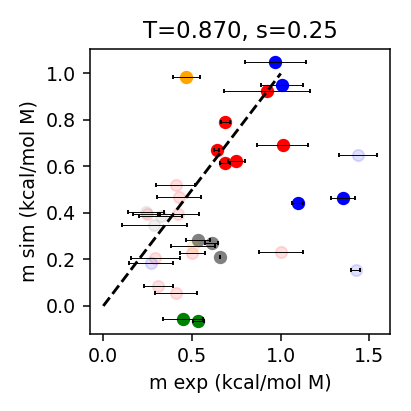

In [40]:
model_id = 0

T_id, msens_id = divmod(model_id,8)

f1, ax1 = plt.subplots(figsize=(3,3), dpi=153)

colors1 = color_arr[np.isin(np.arange(1,100),a_ms[:,-1].astype(int))]

alphas1 = alpha_arr[np.isin(np.arange(1,100),a_ms[:,-1].astype(int))]

for adg, adge, dg, c, a, rid in zip(a_ms[:,3]/4.184, a_ms[:,5]/4.184, mVs[model_id], colors1, alphas1, a_ms[:,-1]):
    ax1.scatter(adg, dg, color=c, alpha=a[2])
    ax1.errorbar(adg, dg, xerr=adge, ecolor='black', fmt='none',elinewidth=0.5,capsize=1)
#     if a[2] == 1:
#         ax1.annotate(str(int(rid)), (adg, dg))
    
ax1.set_xlabel(r'm exp (kcal/mol M)')
ax1.set_ylabel(r'm sim (kcal/mol M)')
ax1.plot(np.linspace(0,1,10), np.linspace(0,1,10), 'k--')
ax1.set_title('T={:.3f}, s={:.2f}'.format(T_targets[T_id], m_senss[msens_id]))

#ax1.annotate('r={:.2f}\nRMSE={:.2f}'.format(r1s[temp_id][0], r1s[temp_id][1]),(6,0))

f1.tight_layout()
#f1.savefig('figs/almut_ms_new.png', dpi=300)

In [15]:
print(a_ms)

[[   nan  1.23   1.     9.   ]
 [   nan  1.37   0.    10.   ]
 [   nan  1.36   0.    11.   ]
 [   nan  1.39   0.    12.   ]
 [   nan  1.42   0.    13.   ]
 [   nan  1.49   0.    14.   ]
 [   nan  2.6    0.    22.   ]
 [   nan  2.46   0.    23.   ]
 [   nan  2.29   0.    24.   ]
 [   nan  2.92   1.    25.   ]
 [   nan  2.77   1.    26.   ]
 [   nan  2.71   1.    27.   ]
 [   nan  2.85   1.    28.   ]
 [   nan  2.76   1.    29.   ]
 [   nan  3.95   1.    32.   ]
 [   nan  2.65   0.    33.   ]
 [   nan  1.83   0.    34.   ]
 [   nan  1.92   0.    36.   ]
 [   nan  2.77   1.    40.   ]
 [   nan  2.59   1.    41.   ]
 [   nan  1.43   0.    42.   ]
 [   nan  2.77   0.    43.   ]
 [   nan  1.9    0.    44.   ]
 [   nan  4.15   0.    45.   ]
 [   nan  1.73   0.    53.   ]
 [   nan  2.35   0.    54.   ]
 [   nan  2.04   0.    55.   ]
 [   nan  3.033  0.    64.   ]
 [   nan  2.25   1.    65.   ]
 [   nan  2.4    0.    66.   ]
 [   nan  2.47   0.    67.   ]
 [   nan  2.46   0.    69.   ]
 [   nan

In [31]:
means = []
for i in range(1,10):
    x=np.mean(mValues[model_id][0:i], axis=0)
    means.append(x)
means = np.asarray(means)

<IPython.core.display.Javascript object>


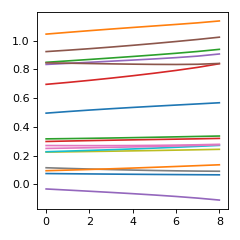

In [32]:
f, ax = plt.subplots(figsize=(3,3))
for j, i in enumerate(means.T):
    if np.isin(j+1,in_ex2):
        ax.plot(i)
f.tight_layout()

# OK so as a check, let's see if the delta G values at chosen temperatures are converging as we add data

Also maybe let's look at m values too

In [135]:
#Define starting variables

pdb_id      = 'fs_almut'
start_frame = 2000
work_dir         = '/project/dinner/aanto/kaiB/up2/20220218_al1_repex/run_0'
n_rep            = 48     # replica number
input_dir  = "{}/inputs".format(work_dir)
result_dir = "{}/results".format(work_dir)

In [136]:
Pot = []
Rg  = []
Rmsd = []
Hb = []
Ts = []
T  = []
PS = []
for i in range(n_rep):
    j=str(i).zfill(2)
    Pot.append(  np.load('{}/{}_{}_Energy.npy'.format(result_dir, pdb_id, j))[:,0] ) 
    Rg.append(   np.load('{}/{}_{}_Rg.npy'    .format(result_dir, pdb_id, j)) ) 
    Hb.append(   np.load('{}/{}_{}_Hbond.npy' .format(result_dir, pdb_id, j)) ) 
    Rmsd.append( np.load('{}/{}_{}_Rmsd.npy'  .format(result_dir, pdb_id, j)) ) 
    PS.append( np.load('{}/{}_{}_PS.npy'  .format(result_dir, pdb_id, j)) ) 

    t = np.load( '{}/{}_{}_T.npy'.format(result_dir, pdb_id, j) )
    nsize = Pot[-1].size
    Ts.append(np.zeros(nsize) + t )
    T.append(t)
    
Rmsd = np.array(Rmsd)
Pot  = np.array(Pot)
Rg   = np.array(Rg)
Hb   = np.array(Hb)
Ts   = np.array(Ts)
T    = np.array(T)
PS   = np.array(PS)

res = np.loadtxt('{}/{}.resid'.format(result_dir, pdb_id), dtype=int)
n_res = res.size

print(PS.shape)

(48, 19999, 91)


# MBAR

In [149]:
cE0 = Pot[:,start_frame:]
print(cE0, start_frame, stop_frame)

[[-159.3197937  -137.84703064 -129.01159668 ... -135.84237671
  -165.50813293 -157.45205688]
 [-135.33630371 -105.52172852 -157.08648682 ... -164.38256836
  -181.80825806 -196.56230164]
 [-171.34303284 -140.38955688 -109.18647003 ...  -96.85292053
  -184.36332703 -127.10276794]
 ...
 [ 264.03723145  278.98815918  315.77044678 ...  283.13052368
   298.35263062  268.79501343]
 [ 280.76931763  229.55163574  350.68984985 ...  235.35064697
   284.11260986  290.22940063]
 [ 262.23129272  258.95715332  269.08779907 ...  270.26260376
   326.93502808  254.47911072]] 2000 4000.0


In [19]:
stop_frames = np.linspace(start_frame + 2000, np.shape(Rmsd)[1]+1,21).astype(int)
kB   = 1.0 # upside unit
T    = np.array(T)
beta = kB*T**(-1)
dGhx_Ts = []
dGhx_Ds = []
mValuesi =[]
for i, stop_frame in enumerate(stop_frames):

    cE0 = Pot[:,start_frame:stop_frame]

    FN           = cE0[0].size
    FNs          = np.zeros([n_rep], np.int32) + FN
    reducedPot0  = np.zeros([n_rep,n_rep,FN], np.float32)
    for k in range(n_rep):
        for l in range(n_rep):
            reducedPot0[k,l] = beta[l] * cE0[k]
    mbar0 = pymbar.MBAR(reducedPot0, FNs, verbose=False)
    print('MBAR done, it {}/11'.format(i))
    
    dGhx_T = []
    for k in range(T.size):
        t = T[k]
        tt = t/0.85*298.

        u_n = (cE0/(t*kB)).flatten()
        log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
        w1 = np.exp(log_w1)
        w1 /= np.sum(w1)

        dG = np.zeros(n_res)
        for r in range(n_res):
            pf_i = PS[:,start_frame:stop_frame,r].flatten()
            mean_pf = np.average(pf_i, weights=w1)
            if mean_pf == 1:
                print(k, r)
                dG[r] = 1000.
            else:
                dG[r] = 0.001987*tt*np.log((mean_pf/(1.-mean_pf)))
        dGhx_T.append(dG)
    dGhx_T = np.array(dGhx_T)
    dGhx_Ts.append(dGhx_T)
    print('dGhx_T done, it {}/11'.format(i))
    
    T_target = 0.86   # the T you want to use 
    m_sens   = 0.25  # it is the sensitivity of the denaturant.
                     # a larger value means a lower concentration 
                     # to unfold the protein
                     # 0.05 is a not bad initial guess for urea

    # the number of protected residues in evergy frame
    pf_frame = np.sum(PS[:,start_frame:stop_frame,:], axis=2).flatten()

    # [den]
    den_min = 0.0
    den_max = 1
    den_bin = 10
    den  = np.linspace(den_min, den_max, den_bin+1)

    # reweight to T_target
    TT = T_target/0.85*298
    m = m_sens*-pf_frame
    u_n    = (cE0/(T_target*kB)).flatten()
    log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
    w1     = np.exp(log_w1)
    w1    /= np.sum(w1)

    # dG at different [den]
    dGhx_D = []
    for d in den:
        w  = np.exp(m*d/T_target)*w1
        w /= np.sum(w)

        probp = np.zeros(n_res)
        for j in range(n_res):
            pf_i = PS[:,start_frame:stop_frame,j].flatten()
            probp[j] = np.sum(pf_i*w)
        probu = 1. - probp
        dGhx_D.append(TT*np.log(probp/probu)*0.001987)
    dGhx_D = np.array(dGhx_D)
    dGhx_Ds.append(dGhx_D)
    # m-value: the slope of dG vs [den]
    mValue = np.diff(dGhx_D, axis=0)/(den[0]-den[1])
    mValuesi.append(mValue)
    print('dGhx_D done, it {}/11'.format(i))
    

MBAR done, it 0/11
dGhx_T done, it 0/11
dGhx_D done, it 0/11
MBAR done, it 1/11
dGhx_T done, it 1/11
dGhx_D done, it 1/11
MBAR done, it 2/11
dGhx_T done, it 2/11
dGhx_D done, it 2/11
MBAR done, it 3/11
dGhx_T done, it 3/11
dGhx_D done, it 3/11
MBAR done, it 4/11
dGhx_T done, it 4/11
dGhx_D done, it 4/11
MBAR done, it 5/11
dGhx_T done, it 5/11
dGhx_D done, it 5/11
MBAR done, it 6/11
dGhx_T done, it 6/11
dGhx_D done, it 6/11
MBAR done, it 7/11
dGhx_T done, it 7/11
dGhx_D done, it 7/11
MBAR done, it 8/11
dGhx_T done, it 8/11
dGhx_D done, it 8/11
MBAR done, it 9/11
dGhx_T done, it 9/11
dGhx_D done, it 9/11
MBAR done, it 10/11
dGhx_T done, it 10/11
dGhx_D done, it 10/11
MBAR done, it 11/11
dGhx_T done, it 11/11
dGhx_D done, it 11/11
MBAR done, it 12/11
dGhx_T done, it 12/11
dGhx_D done, it 12/11
MBAR done, it 13/11
dGhx_T done, it 13/11
dGhx_D done, it 13/11
MBAR done, it 14/11
dGhx_T done, it 14/11
dGhx_D done, it 14/11
MBAR done, it 15/11
dGhx_T done, it 15/11
dGhx_D done, it 15/11
MBAR d

In [20]:
dGhx_D = np.asarray(dGhx_Ds)
dGhx_T = np.asarray(dGhx_Ts)
mValuesi = np.asarray(mValuesi)

<IPython.core.display.Javascript object>


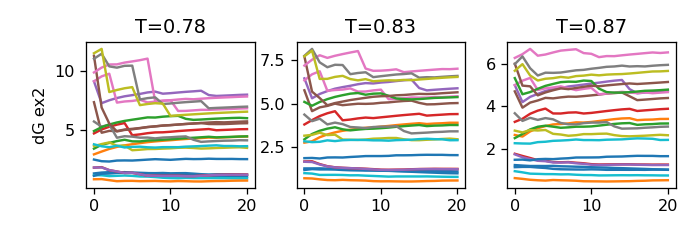

0 (21, 21)
10 (21, 21)
18 (21, 21)


In [21]:
T_ids = [0, 10, 18]
f, ax = plt.subplots(1,3, figsize=(6,2), dpi=145)
x = dGhx_T.swapaxes(0,1)
j=0
for i, dG in enumerate(x): 
    if (np.isin(i, T_ids)):
        dG = dG.T
        dG_trimmed = dG[np.isin(res+1, in_ex2)]
        ax[j].plot(dG_trimmed.T)
        ax[j].set_title('T={:.2}'.format(T[T_ids[j]]))
        print(i, dG_trimmed.shape)
        j+=1
ax[0].set_ylabel('dG ex2')
f.tight_layout()

<IPython.core.display.Javascript object>


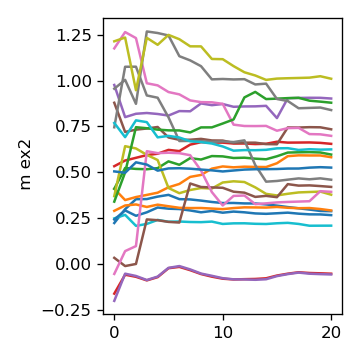

In [22]:
f, ax = plt.subplots(figsize=(3,3), dpi=150)
y = mValuesi
mValuesii = []
for mV in y:
    mV = mV.T
    mValuesii.append(np.mean(mV[:,:5], axis=1))
mValuesii = np.asarray(mValuesii).T
mValuesii_trimmed = mValuesii[np.isin(res+1, in_ex2)]
ax.plot(mValuesii_trimmed.T)
ax.set_ylabel(' m ex2')
f.tight_layout()

In [23]:
stop_frames = np.linspace(start_frame + 2000, np.shape(Rmsd)[1]+1,21).astype(int)
print(stop_frames)

[ 4000  5799  7599  9399 11199 12999 14799 16599 18399 20199 21999 23798
 25598 27398 29198 30998 32798 34598 36398 38198 39998]
